In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os
import sys
from copy import copy, deepcopy

In [2]:
sys.path.append("/root/project/soter_v2")
sys.path.append("/root/project/soter_v2/metric_space_analysis")
sys.path.append("/root/project/soter_v2/loop_topology")

In [3]:
from metric_space_analysis.search import *
from loop_topology.loop_topo import *

In [4]:
# import data
# data = pickle.load(open("report/arch_Simba/obj_edp/bertlarge_input1/layer-4/record.pkl", "rb"))
# data = pickle.load(open("report/arch_Simba/obj_edp/bertlarge_input1/layer-4/long_search/record.pkl", "rb"))
data = pickle.load(open("report/arch_Simba/obj_edp/bertlarge_input1/layer-4/long_search_random_search/record.pkl", "rb"))

In [5]:
# make fundametals
map_records = data["map_record"]
buffers = [
  ("DRAM", 0),
  ("GlobalBuffer", 1),
  ("InputBuffer", 2),
  ("WeightBuffer", 3),
  ("AccumulationBuffer", 4),
  ("Registers", 5),
]

In [6]:
#insert loop topology column
new_map_records = deepcopy(map_records)
new_map_records["topo"] = []
for map_data in new_map_records["map"]:
  topo = LoopTopo(buffers).parse_map(map_data)
  new_map_records["topo"].append(topo)

In [7]:
#	epoch	map	batch_idx	cycle	energy	edp	topo
df = pd.DataFrame(new_map_records)

In [8]:
#cycle	energy	edp
#min	max	mean	min	max	mean	min	max	mean
#epoch	
stat_epoch_df = df.groupby('epoch').agg({
    'cycle': ['min', 'max', 'mean'],
    'energy': ['min', 'max', 'mean'],
    'edp': ['min', 'max', 'mean']
})

In [9]:
# group by topo
## num of search
## min, mean, max, std
df_by_topo = df.groupby('topo').agg(
  count=('topo', 'count'),
  cycle=('cycle', 'mean'),
  energy=('energy', 'mean'),
  edp=('edp', 'mean')
)

In [10]:
df_by_topo

,count,cycle,energy,edp
topo,,,,
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K', 'N'], 'spatial': ['C', 'K', 'N']}, 'WeightBuffer': {'temporal': ['K', 'C'], 'spatial': []}, 'InputBuffer': {'temporal': [], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['K', 'C']}, 'DRAM': {'temporal': ['K', 'C', 'N'], 'spatial': []}}",32,-301600768.0,-14814.249375,5.362166e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K', 'N'], 'spatial': ['C', 'K', 'N']}, 'WeightBuffer': {'temporal': ['K'], 'spatial': []}, 'InputBuffer': {'temporal': ['K'], 'spatial': []}, 'GlobalBuffer': {'temporal': ['C'], 'spatial': ['C']}, 'DRAM': {'temporal': ['K', 'N', 'C'], 'spatial': []}}",32,-383836160.0,-17709.043750,8.556388e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K', 'N'], 'spatial': ['C', 'K']}, 'WeightBuffer': {'temporal': ['C'], 'spatial': []}, 'InputBuffer': {'temporal': ['C', 'K'], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['N']}, 'DRAM': {'temporal': ['K', 'N'], 'spatial': []}}",32,-325005312.0,-14344.530312,5.681474e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K', 'N'], 'spatial': ['C', 'K']}, 'WeightBuffer': {'temporal': [], 'spatial': []}, 'InputBuffer': {'temporal': [], 'spatial': []}, 'GlobalBuffer': {'temporal': ['K'], 'spatial': ['N']}, 'DRAM': {'temporal': ['N', 'K'], 'spatial': []}}",32,-288866304.0,-16727.674687,8.540897e+12
"{'Registers': {'temporal': ['N'], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['C', 'K'], 'spatial': ['C', 'K', 'N']}, 'WeightBuffer': {'temporal': ['C', 'K'], 'spatial': []}, 'InputBuffer': {'temporal': ['K'], 'spatial': []}, 'GlobalBuffer': {'temporal': ['K', 'C'], 'spatial': ['C']}, 'DRAM': {'temporal': ['N', 'K'], 'spatial': []}}",32,-258199552.0,-13583.715000,3.914734e+12
...,...,...,...,...
"{'Registers': {'temporal': [], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['K', 'C', 'N'], 'spatial': ['K', 'N']}, 'WeightBuffer': {'temporal': ['N', 'C'], 'spatial': []}, 'InputBuffer': {'temporal': ['K', 'C'], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['K']}, 'DRAM': {'temporal': ['C', 'K', 'N'], 'spatial': []}}",32,-215584768.0,-13488.680313,3.635292e+12
"{'Registers': {'temporal': [], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['K', 'N', 'C'], 'spatial': ['K', 'N']}, 'WeightBuffer': {'temporal': ['K', 'C'], 'spatial': []}, 'InputBuffer': {'temporal': ['C', 'K'], 'spatial': []}, 'GlobalBuffer': {'temporal': ['K'], 'spatial': ['K', 'C']}, 'DRAM': {'temporal': ['K', 'N'], 'spatial': []}}",32,-257323008.0,-16577.697812,4.868601e+12
"{'Registers': {'temporal': [], 'spatial': []}, 'AccumulationBuffer': {'temporal': ['K'], 'spatial': ['N', 'C']}, 'WeightBuffer': {'temporal': ['N', 'C'], 'spatial': []}, 'InputBuffer': {'temporal': ['C', 'N', 'K'], 'spatial': []}, 'GlobalBuffer': {'temporal': [], 'spatial': ['C']}, 'DRAM': {'temporal': ['N'], 'spatial': []}}",32,-310861824.0,-19315.571250,8.654912e+12


In [11]:
df_by_topo.to_excel("temp.xlsx")

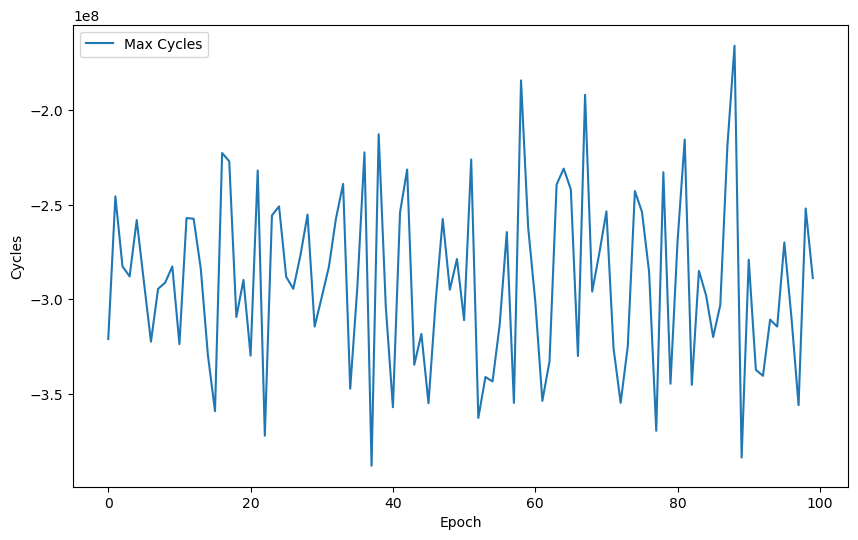

In [12]:
plt.figure(figsize=(10, 6))
# plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'min')], label='Min Cycles')
plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'mean')], label='Max Cycles')
plt.xlabel('Epoch')
plt.ylabel('Cycles')
plt.legend()
plt.show()

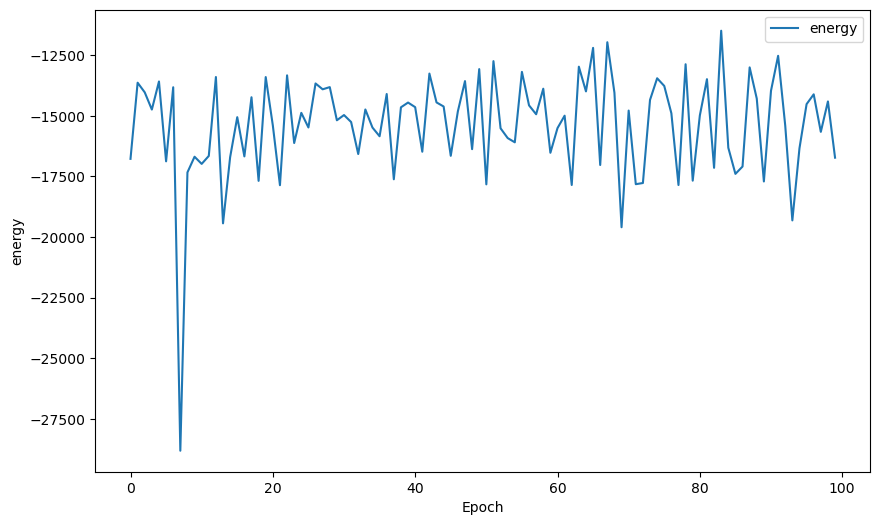

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'min')], label='Min Cycles')
plt.plot(stat_epoch_df.index, stat_epoch_df[('energy', 'mean')], label='energy')
plt.xlabel('Epoch')
plt.ylabel('energy')
plt.legend()
plt.show()

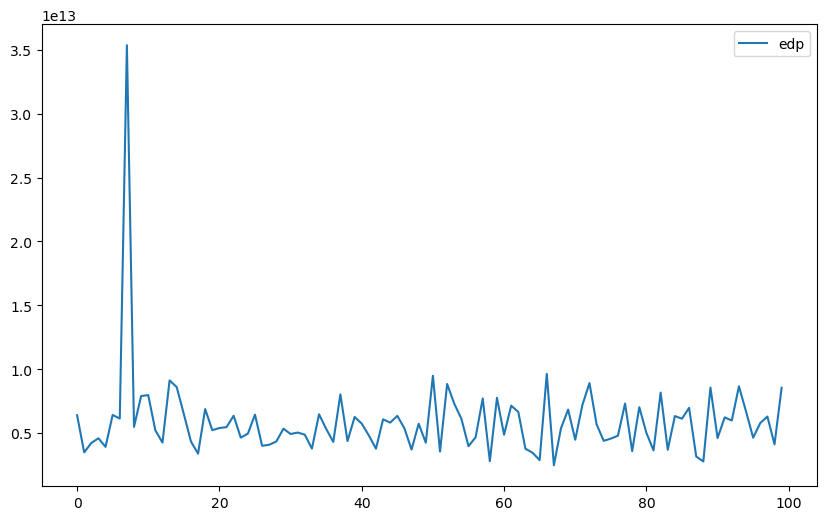

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(stat_epoch_df.index, stat_epoch_df[('edp', 'mean')], label='edp')
plt.legend()
plt.show()

In [15]:
map_records["map"][0]

{'mapping': [{'target': 'Registers',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=1 H=1 N=256',
   'permutation': 'PRCNQSKH'},
  {'target': 'Registers',
   'type': 'datatype',
   'keep': ['Weights'],
   'bypass': ['Inputs', 'Outputs']},
  {'target': 'AccumulationBuffer',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=32 K=1 H=1 N=1',
   'permutation': 'SHCRKPQN'},
  {'target': 'AccumulationBuffer',
   'type': 'spatial',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=8 H=1 N=1',
   'permutation': 'SHCRKPQN'},
  {'target': 'AccumulationBuffer',
   'type': 'datatype',
   'keep': ['Outputs'],
   'bypass': ['Weights', 'Inputs']},
  {'target': 'WeightBuffer',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=2 H=1 N=1',
   'permutation': 'HCNRSPKQ'},
  {'target': 'WeightBuffer',
   'type': 'datatype',
   'keep': ['Weights'],
   'bypass': ['Inputs', 'Outputs']},
  {'target': 'InputBuffer',
   'type': 'temporal',
   'factors': 'R=1 S=1 P=1 Q=1 C=1 K=2 H=1 N=1',
   'perm

In [16]:
min_cycle_map = df.loc[df['cycle'].idxmax()]
min_enery_map = df.loc[df['energy'].idxmax()]
min_edp_map = df.loc[df['edp'].idxmin()]

In [17]:
yaml.dump(min_cycle_map["map"], open("min_cycle_map.yaml", "w"))
yaml.dump(min_enery_map["map"], open("min_energy_map.yaml", "w"))
yaml.dump(min_edp_map["map"], open("min_edp_map.yaml", "w"))

In [18]:
min_cycle_map

epoch                                                       27
map          {'mapping': [{'target': 'Registers', 'type': '...
batch_idx                                                   15
cycle                                              -23068672.0
energy                                                -8211.74
edp                                        189433936609.279999
topo         {'Registers': {'temporal': ['N'], 'spatial': [...
Name: 879, dtype: object

In [19]:
min_enery_map

epoch                                                       95
map          {'mapping': [{'target': 'Registers', 'type': '...
batch_idx                                                    4
cycle                                              -67108864.0
energy                                                -4626.77
edp                                        310497278689.280029
topo         {'Registers': {'temporal': ['N'], 'spatial': [...
Name: 3044, dtype: object

In [20]:
min_edp_map

epoch                                                       36
map          {'mapping': [{'target': 'Registers', 'type': '...
batch_idx                                                    8
cycle                                              -25165824.0
energy                                                -5570.16
edp                                        140177666211.839996
topo         {'Registers': {'temporal': ['N'], 'spatial': [...
Name: 1160, dtype: object